# CWRCzech data

This notebook contains code to demonstrate how to work with CWRCzech and CWRCzech-test sets.

In [1]:
import pandas as pd

## CWRCzech 

CWRCzech is distributed as Parquet files and can be loaded using any library that supports Parquet. We use pandas.

CWRCzech contains following columns:
- requestId: Id of the particular request with a single query.
- query: User query with corrected typos and added diacritical marks.
- url: Document URL.
- title: Words from the document classified by the search engine as a title.
- bte: Body text extract, i.e., document body snippet processed by the internal search engine model and trimmed to 230 characters (snippet size complying with fair use). It is empty for the webpages that block search engines or prohibit usage of their contents for GPT training.
- order: Position of the document in the search results page. Indices may be absent in cases where a document was no longer indexed at the time of dataset creation.
- click: The number of clicks on a given document in given search results.
- dwellTime: Time in seconds spent in the clicked document page before the user returned to the search results page. This information is not always available, typically for the last click in the search results.

In [5]:
cwrczech = pd.read_parquet('train/part-00001-f358ed27-e8cb-4187-bd72-74c7faf94d21-c000.snappy.parquet')
cwrczech

,url,title,bte,query,requestId,rank,clicks,dwellTime
0,http://delfy.cz/ucetni-podpora/covid/pozastave...,Pozastavení EET - Delfy,Návrh na pozastavení EET do 1.1.2023 Poslanci ...,eet pozastavení,43364,4,0,NaN
1,http://fyzika.jreichl.com/main.article/view/45...,Holografie :: MEF,Holografie Na interferenci vysoce koherentního...,co je hologram,43365,5,0,NaN
2,http://www.abc-lekarna.cz/wurm-ex-20-tobolek-7...,Poradna a zkušenosti WURM-EX 20 tobolek | Pora...,Poradna a zkušenosti WURM-EX 20 tobolek Pro vě...,wurm ex nežádoucí účinky,43366,7,1,NaN
3,http://www.grafika4u.cz/,Grafika4u.cz,"Postaráme se o vaši prezentaci firmy, osobnost...",grafika a tvorba etiket,43367,10,0,NaN
4,http://www.pokladnice-minci.cz/stare-vzacne-mi...,Staré vzácné mince a jejich hodnota | Pokladni...,Staré vzácné mince a jejich hodnota. Jaké je j...,staré peníze cenné,43368,3,1,NaN
...,...,...,...,...,...,...,...,...
192400,https://prima-receptar.cz/chutne-exoticke-pomelo/,"Chutné, exotické pomelo – Príma receptář.cz","Chutné, exotické pomelo Málokteré exotické ovo...",pomelo nežádoucí účinky,70902,5,0,NaN
192401,https://prozeny.blesk.cz/clanek/pro-zeny-zdrav...,Proč vás bolí koleno? Toto jsou nejčastější př...,Proč vás bolí koleno? Toto jsou nejčastější př...,Otok kolene,55503,11,1,211.0
192402,https://radiozurnal.rozhlas.cz/ruzne-zdravotni...,Různé zdravotní příznaky po bodnutí komárem | ...,Různé zdravotní příznaky po bodnutí komárem Ko...,velký flek po bodnutí komárem,49309,4,0,NaN
192403,https://sazenicka.cz/pestovani-sater/,Šater aneb nevěstin závoj: Jak si vypěstovat l...,Šater aneb nevěstin závoj: Jak si vypěstovat l...,Jak pěstovat nevěstin závoj,61111,4,0,NaN


With CWRCzech sample loaded, we can for example inspect concrete url.

In [7]:
cwrczech[cwrczech['url'] == 'https://sazenicka.cz/pestovani-sater/']

,url,title,bte,query,requestId,rank,clicks,dwellTime
192403,https://sazenicka.cz/pestovani-sater/,Šater aneb nevěstin závoj: Jak si vypěstovat l...,Šater aneb nevěstin závoj: Jak si vypěstovat l...,Jak pěstovat nevěstin závoj,61111,4,0,NaN
192404,https://sazenicka.cz/pestovani-sater/,Šater aneb nevěstin závoj: Jak si vypěstovat l...,Šater aneb nevěstin závoj: Jak si vypěstovat l...,Jak pěstovat nevěstin závoj,61108,5,0,NaN


We can also analyse the distribution of clicks per query.

In [34]:
import numpy as np, matplotlib.pyplot as plt

cwrczech = pd.read_parquet('train', columns=['query', 'clicks', 'dwellTime'])

Text(0, 0.5, 'Count [-]')

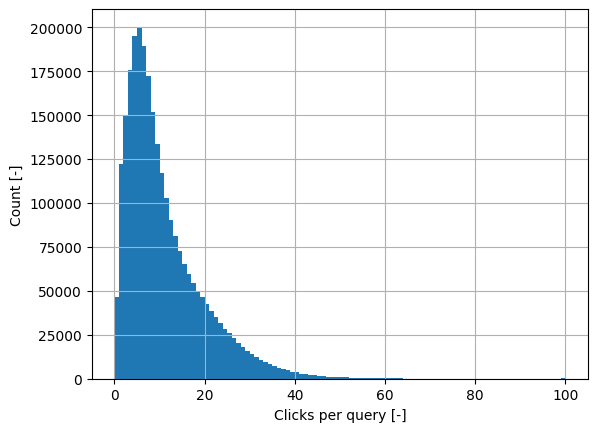

In [33]:
cwrczech.groupby("query").clicks.sum().clip(0, 100).hist(bins=100)

plt.xlabel("Clicks per query [-]")
plt.ylabel("Count [-]")

Or the distribution of dwell times!

Text(0, 0.5, 'Count [-]')

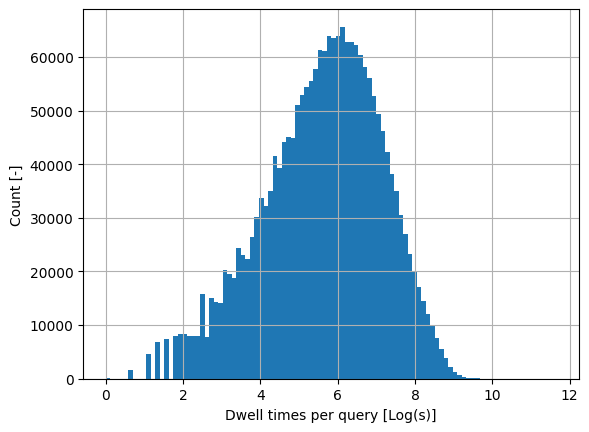

In [38]:
cwrczech[cwrczech.dwellTime > 0].groupby("query").dwellTime.sum().apply(np.log).hist(bins=100)

plt.xlabel("Dwell times per query [Log(s)]")
plt.ylabel("Count [-]")

## CWRCzech-test

CWRCzech-test is distributed as a tsv file. Similarly to CWRCzech, we use pandas to load it.

CWRCzech-test contains following columns:
- query: User query with corrected typos and added diacritical marks.
- url: Document URL.
- title: Words from the document classified by the search engine as a title.
- bte: Body text extract, i.e., document body snippet processed by the internal search engine model and trimmed to 230 characters (snippet size complying with fair use). It is empty for the webpages that block search engines or prohibit usage of their contents for GPT training.
- label: ground-truth label. It is computed as a median value of 2 or 3 annotators.

In [19]:
cwrczech_test = pd.read_parquet('test.parquet')
cwrczech_test


,url,query,title,bte,label
0,http://vseobecnalekarka.cz/aktualni-informace/,karanténa pro očkované,Aktuality – Všeobecná lékařka Újezd,None,0.00
1,http://www.polesisvatyjan.cz/content/cz/Defaul...,vyříznutí dřevěného kruhu,None,POLESÍ SVATÝ JAN Naše firma provádí komplexní ...,0.00
2,https://bandzone.cz/vs/video/61946-vinny-strik...,porno videa,Vinný střik - Videa | Bandzone.cz,Vinný střik pop-rock / Litovel Zpěv - Igor Sit...,0.00
3,https://commons.wikimedia.org/wiki/File:Abszes...,absces v prsu,File:Abszess.jpg - Wikimedia Commons,"File : Abszess.jpg From Wikimedia Commons, the...",0.00
4,https://cs.wikipedia.org/wiki/Grace_Kellyov%C3%A1,nevolnost od krční páteře,Grace Kellyová – Wikipedie,Obsah přesunout do postranního panelu skrýt (ú...,0.00
...,...,...,...,...,...
49940,https://www.uzdravim.cz/zablokovana-krcni-pate...,nevolnost od krční páteře,Zablokovaná krční páteř,Zablokovaná krční páteř Krční páteř je nejvíce...,0.66
49941,https://www.zbozi.cz/kultura-a-zabava/knihy/?v...,tetování motivy vodnář,Knihy Vodnář - Zboží,Knihy Vodnář,0.00
49942,https://www.zbozi.cz/kultura-a-zabava/volny-ca...,jak si uplést košík,Nástroje na nitě a příze Stoklasa - Zboží,Nástroje na nitě a příze Stoklasa Sada háčků n...,0.00
49943,https://www.zbozi.cz/kultura-a-zabava/volny-ca...,jak uplést zimní čepici a šálu,Nástroje na nitě a příze Stoklasa - Zboží,Nástroje na nitě a příze Stoklasa Sada háčků n...,0.00


We can compute various statistics over CWRCzech-test such as the histogram for number of documents per query:

Text(0.5, 0, 'Unique pages per query [-]')

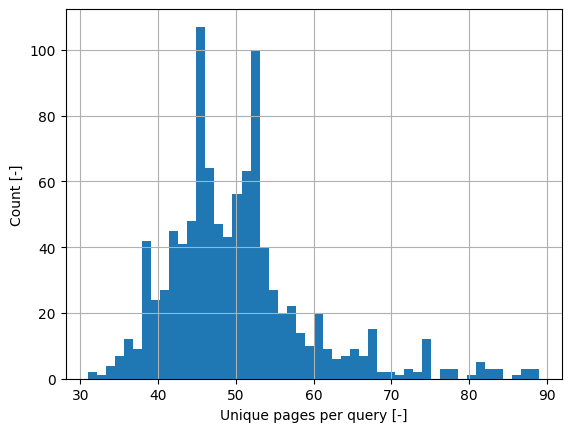

In [27]:
cwrczech_test.groupby('query')['url'].nunique().hist(bins=50)
plt.ylabel("Count [-]")
plt.xlabel("Unique pages per query [-]")